In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [70]:
train=pd.read_csv('train_set.csv')
test=pd.read_csv('test_set.csv')

In [71]:
train.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [72]:
test.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D
count,47860.000000,47860.000000,47860.000000,47860.000000,47860.000000,47860.000000,47860.000000
mean,2014.240535,2.967384,487.537213,26850.575888,63219.002445,4442.285270,8955.073392
std,1.014417,1.571360,332.797855,15505.355108,44550.076565,11187.539269,4889.272851
min,2013.000000,1.000000,1.000000,3.000000,-3962.000000,-168.000000,-478.950000
25%,2013.000000,2.000000,216.000000,13368.750000,23503.000000,0.000000,4400.345021
50%,2014.000000,2.000000,535.000000,26848.500000,62728.000000,0.000000,12041.193700
75%,2015.000000,4.000000,790.000000,40289.250000,92958.750000,2681.250000,12801.790000
max,2016.000000,7.000000,990.000000,53794.000000,326764.000000,170589.000000,16289.860000


In [73]:
print("train shape:"+str(train.shape))
print("test shape:"+str(test.shape))

train shape:(287836, 15)
test shape:(47860, 14)


In [74]:
train.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [75]:
test.isnull().sum()

Year        0
OGC         0
OG          0
DC          0
Dept        0
UC          0
Union       7
JF          7
Job         0
EI          0
Salaries    0
Overtime    0
H/D         0
YT          0
dtype: int64

In [76]:
train.nunique()

Year                       4
OGC                        7
OG                         7
DC                        54
Dept                      54
UC                       789
Union                     73
JF                        55
Job                     1136
EI                     52403
Salaries              104444
Overtime               33632
H/D                   113669
YT                         2
Total_Compensation    155965
dtype: int64

<AxesSubplot:ylabel='OG'>

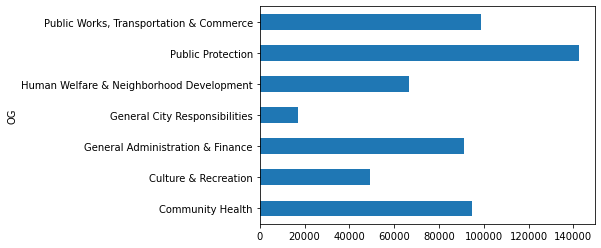

In [77]:
import matplotlib.pyplot as plt
train.groupby(['OG'])['Total_Compensation'].mean(32).head(8).plot(kind='barh')

In [78]:
train['OG'].unique()

array(['Community Health', 'General Administration & Finance',
       'Public Protection', 'Public Works, Transportation & Commerce',
       'Human Welfare & Neighborhood Development', 'Culture & Recreation',
       'General City Responsibilities'], dtype=object)

In [79]:
'''fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(train['Job'],train['Total_Compensation'])
plt.show()'''

"fig,ax=plt.subplots(figsize=(16,8))\nax.scatter(train['Job'],train['Total_Compensation'])\nplt.show()"

In [80]:
third_largest=train.groupby(['Job'])['Total_Compensation'].mean().nlargest(30).reset_index()
high_comp_list=third_largest['Job'].tolist()

In [81]:
def label1(value):
    res=" ".join(value.split())
    if res in high_comp_list:
        return 1
    else: 
        return 0

In [82]:
train['highComp'] = train.Job.apply (label1)
test['highComp'] = test.Job.apply (label1)

In [83]:
train.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,highComp
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,0
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,0
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,0
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,0
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,0


In [84]:
third_small=train.groupby(['Job'])['Total_Compensation'].mean().nsmallest(30).reset_index()
small_comp_list=third_small['Job'].tolist()

In [85]:
def label2(value):
    res=" ".join(value.split())
    if res in small_comp_list:
        return 1
    else:
        return 0

In [86]:
train['lowcomp']=train.Job.apply(label2)
test['lowcomp']=test.Job.apply(label2)

In [87]:
def ImpOG(my_string):
    if my_string == 'Public Protection':
        return 1
    else:
        return 0
    
    
train['ImpOG'] = train.OG.apply(ImpOG)
test['ImpOG'] = test.OG.apply(ImpOG)

In [88]:
'''ax,fig=plt.subplots(figsize=(16,8))
ax.scatter(train['Job'],train['H/D'])
plt.show()'''

"ax,fig=plt.subplots(figsize=(16,8))\nax.scatter(train['Job'],train['H/D'])\nplt.show()"

In [89]:
train=train[(train['Salaries']>-4000)]

In [90]:
train=train[(train['Overtime']>-170)]

In [91]:
train.shape

(287816, 18)

In [92]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
        # replace nan values with most occured category
     #DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName].fillna(most_frequent_category,inplace=True)

In [93]:
for Columns in ['Union']:
    impute_nan_most_frequent_category(train,Columns)

for Columns in ['JF']:
    impute_nan_most_frequent_category(train,Columns)


for Columns in ['Union']:
    impute_nan_most_frequent_category(test,Columns)

for Columns in ['JF']:
    impute_nan_most_frequent_category(test,Columns)

In [94]:
object_dtype=[x for x in train.columns if train[x].dtypes=='object']

In [95]:
meanCombo=train.groupby(['OG','Dept','Union','JF','Job','YT'])['Total_Compensation'].mean().reset_index()
meanCombo = meanCombo.rename(columns={'Total_Compensation':'combo_mean'})

In [96]:
meanCombo

,OG,Dept,Union,JF,Job,YT,Total_Compensation
0,Community Health,Public Health,"Automotive Machinists, Local 1414",Supervisory-Labor & Trade,Bldg & Grounds Maint Sprv,Calendar,182723.000000
1,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Carpenter,Calendar,128214.500000
2,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Carpenter,Fiscal,124950.666667
3,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Electrician,Calendar,152581.000000
4,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Locksmith,Calendar,123483.666667
...,...,...,...,...,...,...,...
8802,"Public Works, Transportation & Commerce",Public Library,"Laborers, Local 261",Semi-Skilled & General Labor,General Laborer,Calendar,93804.000000
8803,"Public Works, Transportation & Commerce",Public Library,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Project Director,Calendar,189459.000000
8804,"Public Works, Transportation & Commerce",Recreation and Park Commission,"Laborers, Local 261",Semi-Skilled & General Labor,General Laborer,Calendar,81948.000000
8805,"Public Works, Transportation & Commerce",Recreation and Park Commission,"Prof & Tech Engineers - Miscellaneous, Local 21",Professional Engineering,Eng/Arch/Landscape Arch Sr,Calendar,207902.000000


In [52]:
train = pd.merge(train,meanCombo, on=['OG','Dept','Union','JF','Job','YT'], how="left")

In [53]:
train.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,highComp,lowcomp,ImpOG,combo_mean
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,0,0,0,14629.210526
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,0,0,0,107331.486301
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,0,0,0,117009.133333
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,0,0,1,191535.827189
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,0,0,0,123248.571429


In [54]:
min_value = train['Salaries'].min()
max_value = train['Salaries'].max()
print(min_value)
print(max_value)

-3772
515101


In [55]:
import numpy as np
bins = np.linspace(min_value,max_value,4)

In [57]:
labels = ['small', 'medium', 'big']

In [66]:
train.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,highComp,lowcomp,ImpOG,combo_mean,bins_sal
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,0,0,0,14629.210526,small
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,0,0,0,107331.486301,small
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,0,0,0,117009.133333,small
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,0,0,1,191535.827189,small
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,0,0,0,123248.571429,small


In [68]:
colNewF=['OG','Dept','Union','JF','YT','Job']

for i in colNewF:
  temp = trainData.groupby([i])["Total_Compensation"].agg(["min", "max","std","mean","median"]).reset_index()
  temp.columns = [i,i+"_com_min", i+"_com_max", i+"_com_std",i+"_com_mean",i+"_com_median"]
  trainData = pd.merge(trainData,temp, on=[i], how="left")
  testData = pd.merge(testData,temp, on=[i], how="left")

,OG,Dept,Union,JF,Job,YT,Total_Compensation
0,Community Health,Public Health,"Automotive Machinists, Local 1414",Supervisory-Labor & Trade,Bldg & Grounds Maint Sprv,Calendar,182723.000000
1,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Carpenter,Calendar,128214.500000
2,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Carpenter,Fiscal,124950.666667
3,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Electrician,Calendar,152581.000000
4,Community Health,Public Health,"Carpenters, Local 22",Journeyman Trade,Locksmith,Calendar,123483.666667
...,...,...,...,...,...,...,...
8802,"Public Works, Transportation & Commerce",Public Library,"Laborers, Local 261",Semi-Skilled & General Labor,General Laborer,Calendar,93804.000000
8803,"Public Works, Transportation & Commerce",Public Library,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Project Director,Calendar,189459.000000
8804,"Public Works, Transportation & Commerce",Recreation and Park Commission,"Laborers, Local 261",Semi-Skilled & General Labor,General Laborer,Calendar,81948.000000
8805,"Public Works, Transportation & Commerce",Recreation and Park Commission,"Prof & Tech Engineers - Miscellaneous, Local 21",Professional Engineering,Eng/Arch/Landscape Arch Sr,Calendar,207902.000000
